In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Python_Linear_Regres.csv")

In [3]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [4]:
df = pd.DataFrame(df)

In [5]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [6]:
df.experience = df.experience.fillna('zero')

In [7]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [8]:
import math
mean_test_score = math.floor(df['test_score(out of 10)'].mean())
mean_test_score


7

In [9]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(mean_test_score)

In [10]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [11]:
from word2number import w2n

In [12]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [13]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Experience v/s Salary')

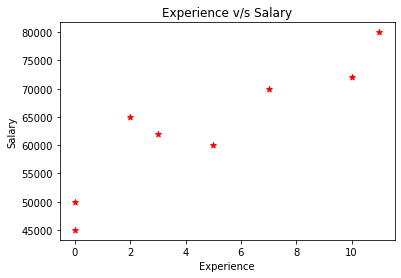

In [14]:
plt.scatter(df['experience'],df['salary($)'],marker='*',color='r')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title('Experience v/s Salary')

Text(0.5, 1.0, 'Test Score v/s Salary')

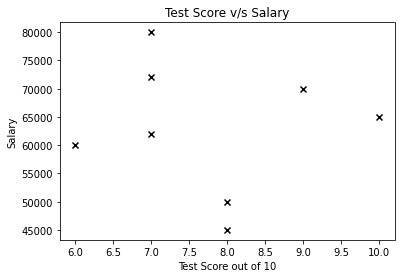

In [15]:
plt.scatter(df['test_score(out of 10)'],df['salary($)'],marker='x',color='black')
plt.xlabel("Test Score out of 10")
plt.ylabel("Salary")
plt.title('Test Score v/s Salary')

Text(0.5, 1.0, 'Interview Score v/s Salary')

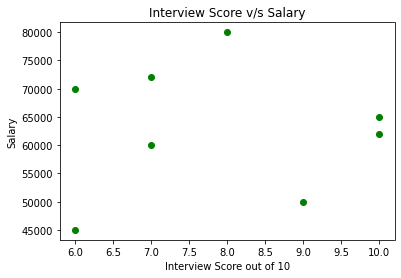

In [16]:
plt.scatter(df['interview_score(out of 10)'],df['salary($)'],color='g')
plt.xlabel("Interview Score out of 10")
plt.ylabel("Salary")
plt.title('Interview Score v/s Salary')

Text(0, 0.5, 'Salary')

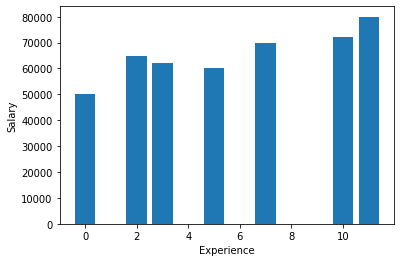

In [17]:
plt.bar(df['experience'],df['salary($)'])
plt.xlabel("Experience")
plt.ylabel("Salary")

In [18]:
X = df.drop('salary($)',axis='columns')

In [19]:
y = df['salary($)']

In [20]:
X

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,7.0,7
7,11,7.0,8


In [21]:
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [60]:
X_test

,experience,test_score(out of 10),interview_score(out of 10)
5,3,7.0,10
7,11,7.0,8


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
 y_pred = model.predict(X_test)

In [28]:
y_pred

array([59382.88440334, 79017.2596143 ])

In [29]:
model.score(X_test,y_test)

0.9517588104199721

In [30]:
model.score(X_train,y_train)

0.9697131353647002

In [31]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [32]:
print('slope :',model.coef_)
print('inter :',model.intercept_)

slope : [2901.1003848  2517.38337946 1787.21393371]
inter : 15185.760255631358


In [33]:
mean_absolute_error(y_test,y_pred)

1799.9279911789235

In [34]:
mean_squared_error(y_test,y_pred)

3907536.3559822626

In [35]:
r2_score(y_test,y_pred)

0.9517588104199721

In [36]:
# import joblib
# filename = 'salary_pred.sav'
# joblib.dump(model,filename)
import pickle
pickle.dump(model, open('model.pkl', 'wb'))